In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
#set up seed for consistancy
torch.manual_seed(1)
batch_size = 64
#get MNIST dataset
data_train = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

data_test = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor(),
                                          download=True)
train_loader = torch.utils.data.DataLoader(data_train, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size,
                                         shuffle=False)


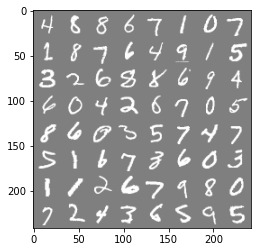

torch.Size([64, 1, 28, 28])


In [4]:
rand_data = iter(train_loader)
images, labels = rand_data.next()

def showData(images):
    images = images/2+0.5
    npimg = images.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
    
showData(torchvision.utils.make_grid(images))
convd1 =nn.Conv2d(1, 20, 3)
pool=nn.MaxPool2d(2,2)
convd2 =nn.Conv2d(20, 5, 3)
#x=convd1(images)
#nn.ReLU(x)
#x=pool(x)
#x=convd2(x)
#x=pool(x)
#nn.Flatten(x)
print(images.shape)

In [5]:
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.convolution = nn.Sequential(
            nn.Conv2d(1, 10, 3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(10, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(16*5*5, 500), 
            nn.ReLU(),
            nn.Linear(500, 250),
            nn.ReLU(),
            nn.Linear(250, 125),
            nn.ReLU(),
            nn.Linear(125, 10)
        )

    def forward(self, x):
        outputs = self.convolution(x)
        return outputs

In [6]:
class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.convolution = nn.Sequential(
            nn.Conv2d(1, 10, 3),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(10*13*13, 500), 
            nn.ReLU(),
            nn.Linear(500, 250),
            nn.ReLU(),
            nn.Linear(250, 125),
            nn.ReLU(),
            nn.Linear(125, 10)
        )

    def forward(self, x):
        outputs = self.convolution(x)
        return outputs

In [7]:
class CNN_3(nn.Module):
    def __init__(self):
        super(CNN_3, self).__init__()
        self.convolution = nn.Sequential(
            nn.Conv2d(1, 20, 3),
            #nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(20, 5, 3),
            #nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(5*5*5, 400), 
            #nn.ReLU(),
            nn.Linear(400, 200),
            #nn.ReLU(),
            nn.Linear(200, 100),
            #nn.ReLU(),
            nn.Linear(100, 10)
        )

    def forward(self, x):
        outputs = self.convolution(x)
        return outputs

In [8]:
def trainModel(model,num_epochs):
    n_total_steps = len(train_loader)
    loss_train = []
    epochs = []
    accuracy_train = []
    print('Training the model')
    for epoch in range(num_epochs):  # loop over the dataset multiple times
        n_correct = 0
        n_samples = 0
        count = 0 
        loss_per_batch = 0
        for i, (inputs, labels) in enumerate(train_loader): 
            count +=1
            # get the inputs; data is a list of [inputs, labels]
            #inputs, labels = data
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer_sgd.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs).to(device)
            loss = loss_func(outputs, labels)
            loss.backward()
            optimizer_sgd.step()
            loss_per_batch += loss.data
            # print statistics
            #running_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}, Accuracy : {acc} %')
                #loss_train.append(loss.item())
        print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy : {acc} %')
        epochs.append(epoch)
        accuracy_train.append(acc)
        loss_per_batch /= count
        loss_train.append(loss_per_batch)
    print('Training done')            
    return epochs,loss_train,accuracy_train

def testModel(model,num_epochs):
    for epoch in range(1):
        with torch.no_grad():
            n_correct = 0
            n_samples = 0
            for images, labels in test_loader:
                prediction = model(images)
                # max returns (value ,index)
                _, predicted = torch.max(prediction.data, 1)
                n_samples += labels.size(0)
                n_correct += (predicted == labels).sum().item()

            netTest_acc1 = 100.0 * n_correct / n_samples
            print(f'Accuracy of the network on the test images: {netTest_acc1} %')
    

In [9]:
learning_rate = 0.001
cnn_model_one = CNN_1().to(device)
#cnn_model_one.to(device)

loss_func = nn.CrossEntropyLoss()
optimizer_sgd = torch.optim.SGD(cnn_model_one.parameters(), lr=learning_rate, momentum=0.9)

In [10]:
epochs,loss_train,accuracy_train=trainModel(cnn_model_one,20)
#trainModel(cnn_model_one,4)


Training the model
Epoch [1/20], Step [100/938], Loss: 2.3083, Accuracy : 9.875 %
Epoch [1/20], Step [200/938], Loss: 2.3044, Accuracy : 10.53125 %
Epoch [1/20], Step [300/938], Loss: 2.3026, Accuracy : 10.5625 %
Epoch [1/20], Step [400/938], Loss: 2.3015, Accuracy : 10.60546875 %
Epoch [1/20], Step [500/938], Loss: 2.2917, Accuracy : 10.74375 %
Epoch [1/20], Step [600/938], Loss: 2.2939, Accuracy : 10.841145833333334 %
Epoch [1/20], Step [700/938], Loss: 2.2911, Accuracy : 10.993303571428571 %
Epoch [1/20], Step [800/938], Loss: 2.2916, Accuracy : 11.04296875 %
Epoch [1/20], Step [900/938], Loss: 2.2821, Accuracy : 11.12326388888889 %
Epoch [1/20], Loss: 2.2879, Accuracy : 11.153333333333334 %
Epoch [2/20], Step [100/938], Loss: 2.2782, Accuracy : 17.796875 %
Epoch [2/20], Step [200/938], Loss: 2.2660, Accuracy : 20.4140625 %
Epoch [2/20], Step [300/938], Loss: 2.2510, Accuracy : 25.161458333333332 %
Epoch [2/20], Step [400/938], Loss: 2.2305, Accuracy : 28.1015625 %
Epoch [2/20], Ste

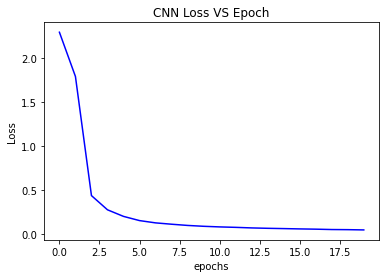

In [11]:
#plot
plt.plot(epochs,loss_train,color="blue")
plt.title('CNN Loss VS Epoch')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

In [12]:
len(epochs)

20

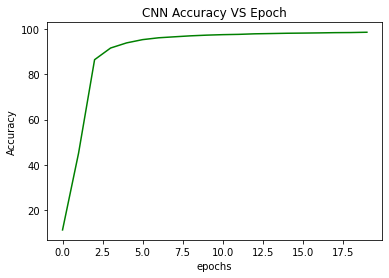

In [13]:
#plot
plt.plot(epochs,accuracy_train,color="green")
plt.title('CNN Accuracy VS Epoch')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

Training the model
Epoch [1/20], Step [100/938], Loss: 2.3070, Accuracy : 10.84375 %
Epoch [1/20], Step [200/938], Loss: 2.3008, Accuracy : 10.78125 %
Epoch [1/20], Step [300/938], Loss: 2.2860, Accuracy : 12.84375 %
Epoch [1/20], Step [400/938], Loss: 2.2753, Accuracy : 14.40234375 %
Epoch [1/20], Step [500/938], Loss: 2.2559, Accuracy : 16.075 %
Epoch [1/20], Step [600/938], Loss: 2.2200, Accuracy : 19.309895833333332 %
Epoch [1/20], Step [700/938], Loss: 2.1708, Accuracy : 23.325892857142858 %
Epoch [1/20], Step [800/938], Loss: 2.0283, Accuracy : 26.447265625 %
Epoch [1/20], Step [900/938], Loss: 1.6347, Accuracy : 29.229166666666668 %
Epoch [1/20], Loss: 1.4353, Accuracy : 30.441666666666666 %
Epoch [2/20], Step [100/938], Loss: 1.0046, Accuracy : 68.78125 %
Epoch [2/20], Step [200/938], Loss: 0.9556, Accuracy : 72.15625 %
Epoch [2/20], Step [300/938], Loss: 0.6854, Accuracy : 74.13020833333333 %
Epoch [2/20], Step [400/938], Loss: 0.4296, Accuracy : 75.91796875 %
Epoch [2/20], St

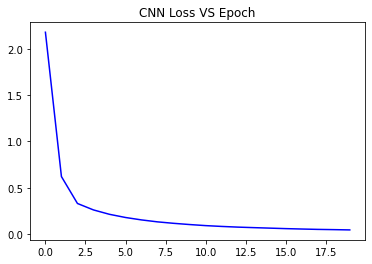

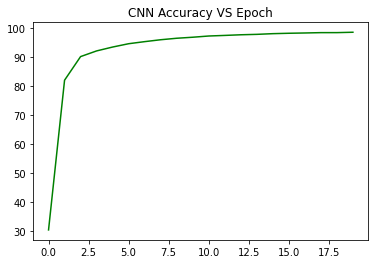

In [14]:
learning_rate = 0.001
cnn_model_two = CNN_2().to(device)
#cnn_model_one.to(device)

loss_func = nn.CrossEntropyLoss()
optimizer_sgd = torch.optim.SGD(cnn_model_two.parameters(), lr=learning_rate, momentum=0.9)
epochs,loss_train,accuracy_train=trainModel(cnn_model_two,20)
#plot
plt.plot(epochs,loss_train,color="blue")
plt.title('CNN Loss VS Epoch')
plt.show()

#plot
plt.plot(epochs,accuracy_train,color="green")
plt.title('CNN Accuracy VS Epoch')
plt.show()


Training the model
Epoch [1/20], Step [100/938], Loss: 2.2861, Accuracy : 13.34375 %
Epoch [1/20], Step [200/938], Loss: 2.2497, Accuracy : 17.203125 %
Epoch [1/20], Step [300/938], Loss: 2.1519, Accuracy : 23.927083333333332 %
Epoch [1/20], Step [400/938], Loss: 1.3856, Accuracy : 31.9375 %
Epoch [1/20], Step [500/938], Loss: 0.6618, Accuracy : 40.34375 %
Epoch [1/20], Step [600/938], Loss: 0.4788, Accuracy : 47.098958333333336 %
Epoch [1/20], Step [700/938], Loss: 0.3608, Accuracy : 52.426339285714285 %
Epoch [1/20], Step [800/938], Loss: 0.3621, Accuracy : 56.607421875 %
Epoch [1/20], Step [900/938], Loss: 0.4016, Accuracy : 60.00347222222222 %
Epoch [1/20], Loss: 0.2976, Accuracy : 61.093333333333334 %
Epoch [2/20], Step [100/938], Loss: 0.4083, Accuracy : 87.65625 %
Epoch [2/20], Step [200/938], Loss: 0.4441, Accuracy : 87.9453125 %
Epoch [2/20], Step [300/938], Loss: 0.6035, Accuracy : 88.41666666666667 %
Epoch [2/20], Step [400/938], Loss: 0.5493, Accuracy : 88.4453125 %
Epoch [

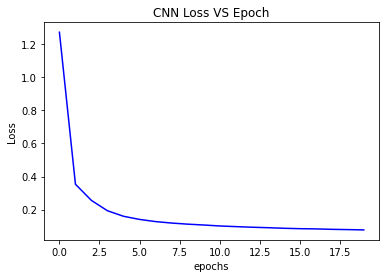

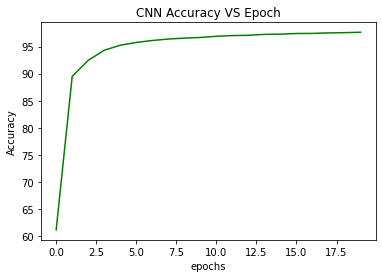

In [15]:
learning_rate = 0.001
cnn_model_three = CNN_3().to(device)
#cnn_model_one.to(device)

loss_func = nn.CrossEntropyLoss()
optimizer_sgd = torch.optim.SGD(cnn_model_three.parameters(), lr=learning_rate, momentum=0.9)
epochs,loss_train,accuracy_train=trainModel(cnn_model_three,20)
#plot
plt.plot(epochs,loss_train,color="blue")
plt.title('CNN Loss VS Epoch')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

#plot
plt.plot(epochs,accuracy_train,color="green")
plt.title('CNN Accuracy VS Epoch')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()